In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

## Speed Benchmark

In [21]:
# Walk the current folder and find all the directories
timing_files = []

for root, dirs, files in os.walk(".", topdown=False):
    for name in files:
        if name == "processing_times.txt":
            timing_files.append(os.path.join(root, name))

print("timing files: ", timing_files)

# Read the timing files and store the data in a dictionary
# Each line is like this: <video_name>: 0.7338857650756836 seconds, 96.74530203304593 fps
data = {}

for timing_file in timing_files:
    avg_fps = 0
    total_samples = 0
    with open(timing_file, "r") as f:
        for line in f:
            line = line.split()
            avg_fps += float(line[-2])
            total_samples += 1

    avg_fps /= total_samples
    data[timing_file.split("/")[1]] = avg_fps

# Create a dataframe from the dictionary
df = pd.DataFrame.from_dict(data, orient="index", columns=["AVG_FPS"]).sort_values(by="AVG_FPS")
df

timing files:  ['./bench_kalman/processing_times.txt', './bench_naive/processing_times.txt', './bench_full/processing_times.txt', './bench_kalman_hungarian/processing_times.txt']


,AVG_FPS
bench_full,3.735977
bench_kalman_hungarian,60.782374
bench_kalman,65.774557
bench_naive,104.965601


<Axes: title={'center': 'Average FPS for each version'}>

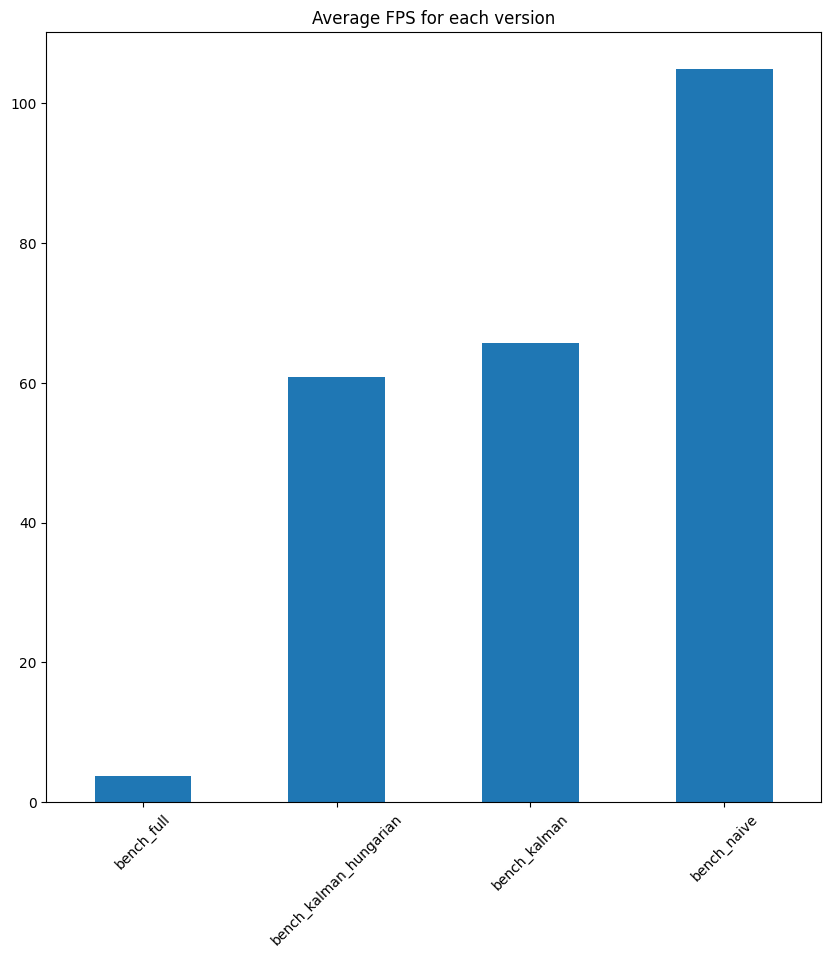

In [24]:
df["AVG_FPS"].plot(kind="bar", figsize=(10, 10), title="Average FPS for each version", rot=45)

## Quality Benchmark

### Loading Data

In [29]:
indexes = ["bench_naive", "bench_kalman", "bench_kalman_hungarian", "bench_full"]

In [30]:
df_clear = pd.read_csv("CLEAR.csv")
df_clear.index = indexes
df_clear

,MOTA,MOTP,MODA,CLR_Re,CLR_Pr,MTR,PTR,MLR,sMOTA,CLR_TP,CLR_FN,CLR_FP,IDSW,MT,PT,ML,Frag
bench_naive,5.904,72.367,25.824,48.327,68.229,15.6,42.2,42.2,-7.4502,19285,20620,8980,7949,78,211,211,1959
bench_kalman,6.335,72.366,25.829,48.330,68.233,15.6,42.2,42.2,-7.0206,19286,20619,8979,7779,78,211,211,1960
bench_kalman_hungarian,20.544,72.250,25.573,48.202,68.052,15.8,42.6,41.6,7.1677,19235,20670,9030,2007,79,213,208,1878
bench_full,42.827,77.109,45.308,71.347,73.262,56.0,31.2,12.8,26.4950,28471,11434,10391,990,280,156,64,1165


In [31]:
df_dets = pd.read_csv("dets.csv")
df_dets.index = indexes
df_dets

,Dets,GT_Dets,IDs,GT_IDs
bench_naive,28265,39905,13706,500
bench_kalman,28265,39905,13474,500
bench_kalman_hungarian,28265,39905,2528,500
bench_full,38862,39905,1978,500


In [32]:
df_hota = pd.read_csv("HOTA.csv")
df_hota.index = indexes
df_hota

,HOTA,DetA,AssA,DetRe,DetPr,AssRe,AssPr,LocA,OWTA,HOTA(0),LocA(0),HOTALocA(0)
bench_naive,9.9432,30.573,3.4480,37.488,52.926,3.5021,86.997,75.901,11.080,13.718,66.980,9.1883
bench_kalman,10.0410,30.570,3.5137,37.484,52.920,3.5678,86.808,75.895,11.189,13.851,66.971,9.2758
bench_kalman_hungarian,23.2590,30.366,18.0690,37.293,52.652,20.2040,61.655,75.821,25.857,33.233,66.677,22.1590
bench_full,39.7190,44.412,36.0290,57.222,58.758,44.7850,66.687,80.212,45.267,51.505,74.826,38.5390


In [33]:
df_id = pd.read_csv("ID.csv")
df_id.index = indexes
df_id

,IDF1,IDR,IDP,IDTP,IDFN,IDFP
bench_naive,7.5136,6.4177,9.0607,2561,37344,25704
bench_kalman,7.5693,6.4654,9.1279,2580,37325,25685
bench_kalman_hungarian,25.9200,22.1400,31.2580,8835,31070,19430
bench_full,47.7260,47.1020,48.3660,18796,21109,20066


In [34]:
df_vace = pd.read_csv("VACE.csv")
df_vace.index = indexes
df_vace

,SFDA,ATA
bench_naive,42.739,0.63984
bench_kalman,42.739,0.66050
bench_kalman_hungarian,42.739,6.94180
bench_full,57.071,16.70600


### Let's plot the asked metrics

<Axes: title={'center': 'HOTA for each version'}>

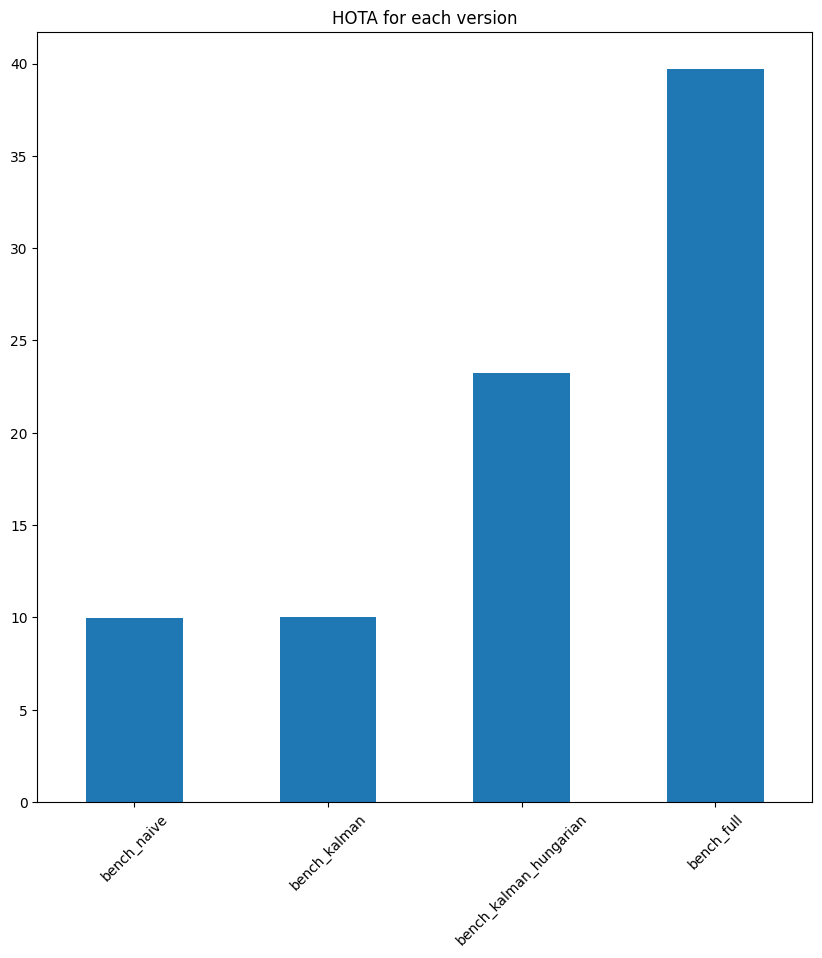

In [35]:
# HOTA
df_hota["HOTA"].plot(kind="bar", figsize=(10, 10), title="HOTA for each version", rot=45)

<Axes: title={'center': 'MOTA for each version'}>

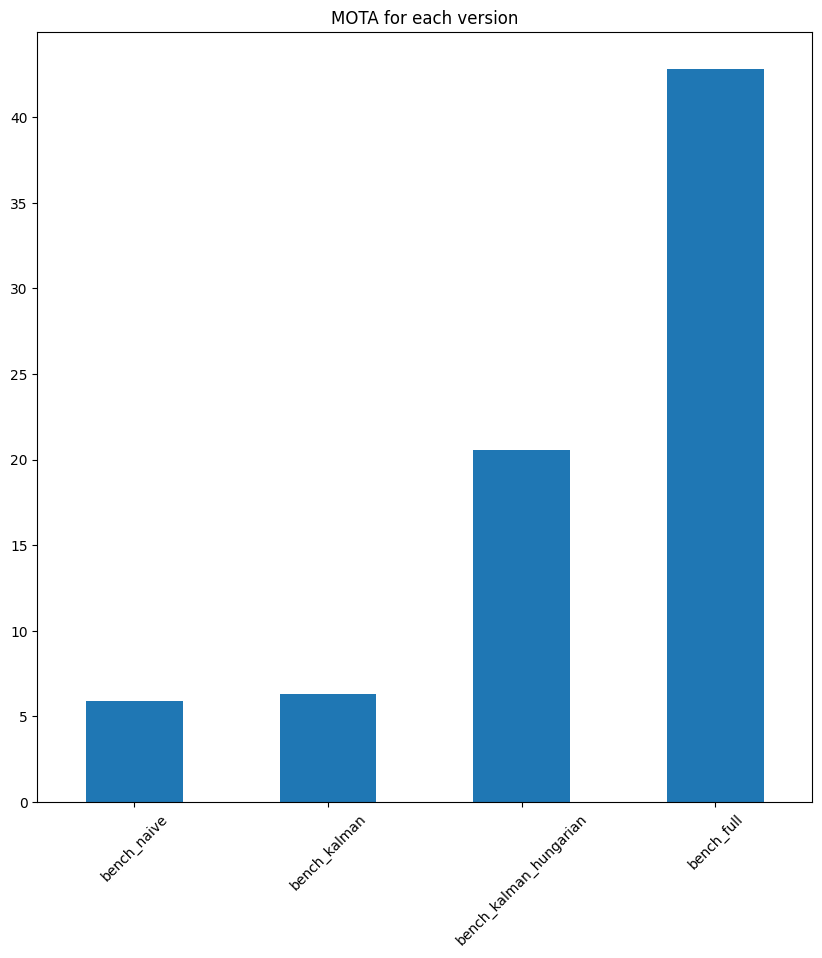

In [36]:
# MOTA
df_clear["MOTA"].plot(kind="bar", figsize=(10, 10), title="MOTA for each version", rot=45)

<Axes: title={'center': 'IDF1 for each version'}>

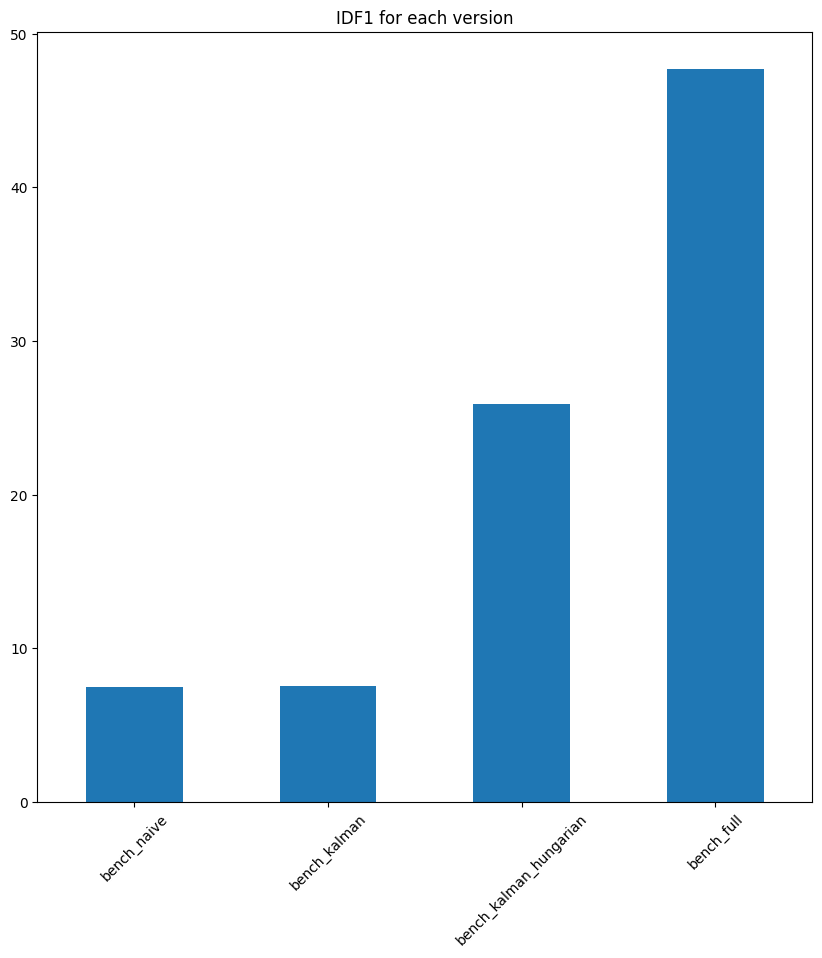

In [37]:
# IDF1
df_id["IDF1"].plot(kind="bar", figsize=(10, 10), title="IDF1 for each version", rot=45)

<Axes: title={'center': 'ID_Switch for each version'}>

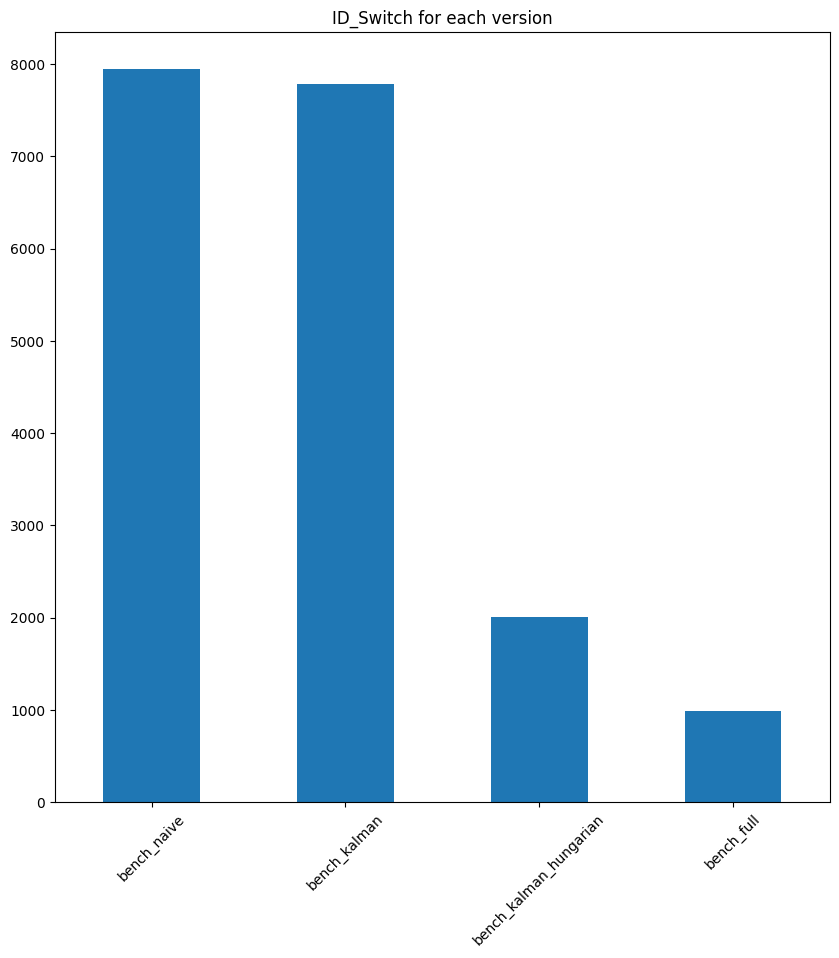

In [40]:
# ID_Switch
df_clear["IDSW"].plot(kind="bar", figsize=(10, 10), title="ID Switch for each version", rot=45)

<Axes: title={'center': 'Fragmentation for each version'}>

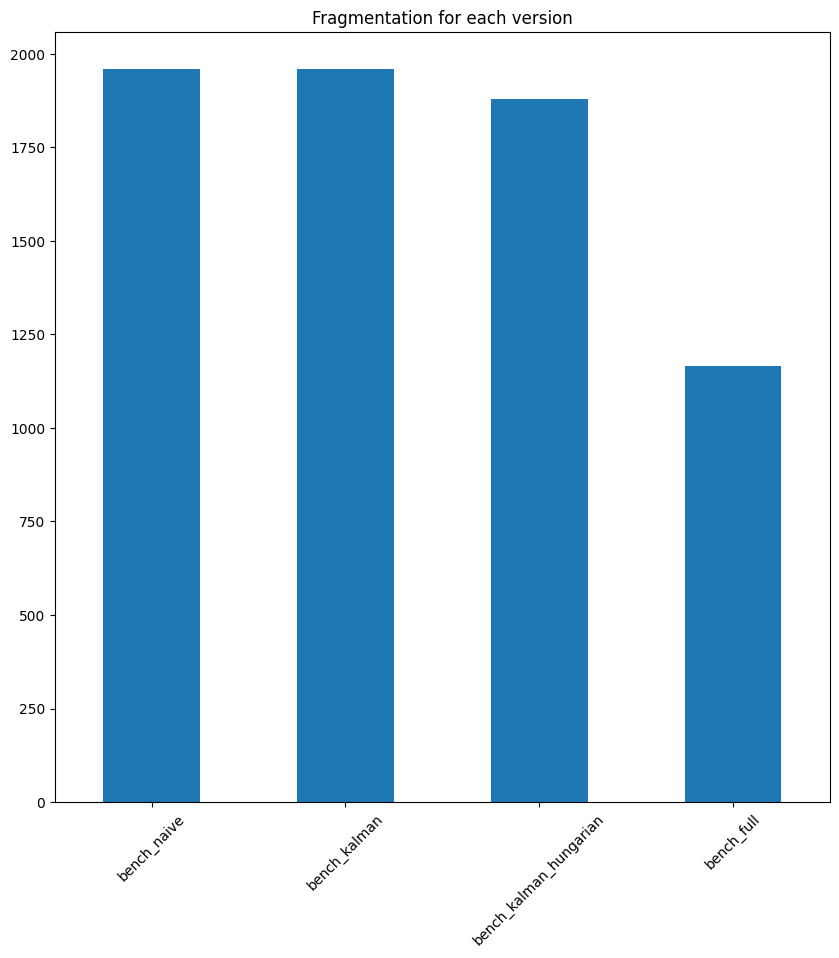

In [41]:
# Fragmentation
df_clear["Frag"].plot(kind="bar", figsize=(10, 10), title="Fragmentation for each version", rot=45)

In [42]:
df_dets

,Dets,GT_Dets,IDs,GT_IDs
bench_naive,28265,39905,13706,500
bench_kalman,28265,39905,13474,500
bench_kalman_hungarian,28265,39905,2528,500
bench_full,38862,39905,1978,500


<Axes: title={'center': 'Unique IDs for each version'}>

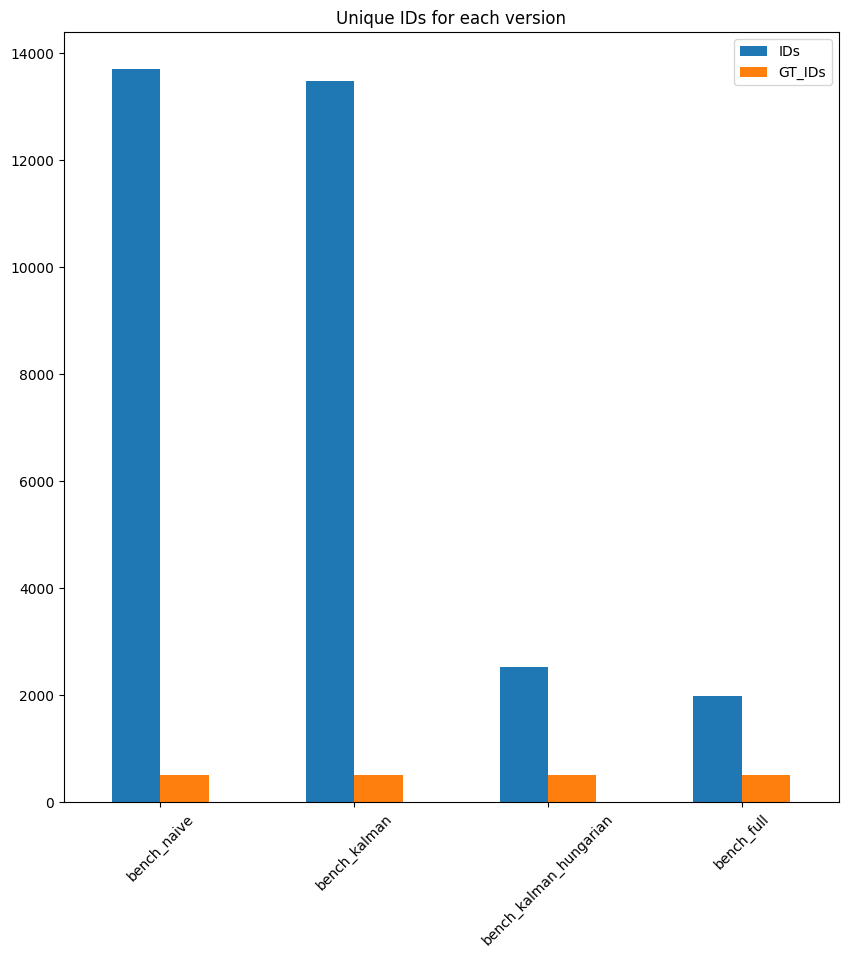

In [45]:
# Unique ids
df_dets[["IDs", "GT_IDs"]].plot(kind="bar", figsize=(10, 10), title="Unique IDs for each version", rot=45)